### Abhilash V R
### Tash  #3  (Exploratory Data Analysis - Retail)

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

### Importing the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\GRIP\SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Exploring the data

In [54]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [55]:
df.corr(method ='kendall')

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.001465,0.010015,0.037496,-0.003111
Sales,-0.001465,1.000000,0.238978,-0.041826,0.452118
Quantity,0.010015,0.238978,1.000000,-0.000698,0.171843
Discount,0.037496,-0.041826,-0.000698,1.000000,-0.428205
Profit,-0.003111,0.452118,0.171843,-0.428205,1.000000


In [56]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [57]:
correlation=df.corr()

In [58]:
correlation['Profit'].abs().sort_values()

Postal Code    0.029961
Quantity       0.066253
Discount       0.219487
Sales          0.479064
Profit         1.000000
Name: Profit, dtype: float64

In [59]:
df.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288      2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370      2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West     Office Supplies  Labels        41.400   4         0.0        19.8720    

In [60]:
# Dropping irrelevant columns
df = df.drop(columns=['Postal Code'], axis=1)
df.head(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


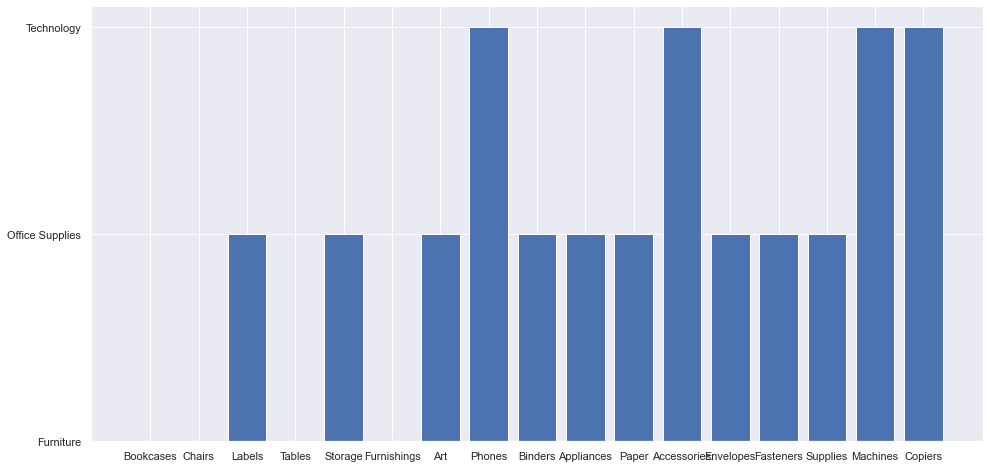

In [61]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

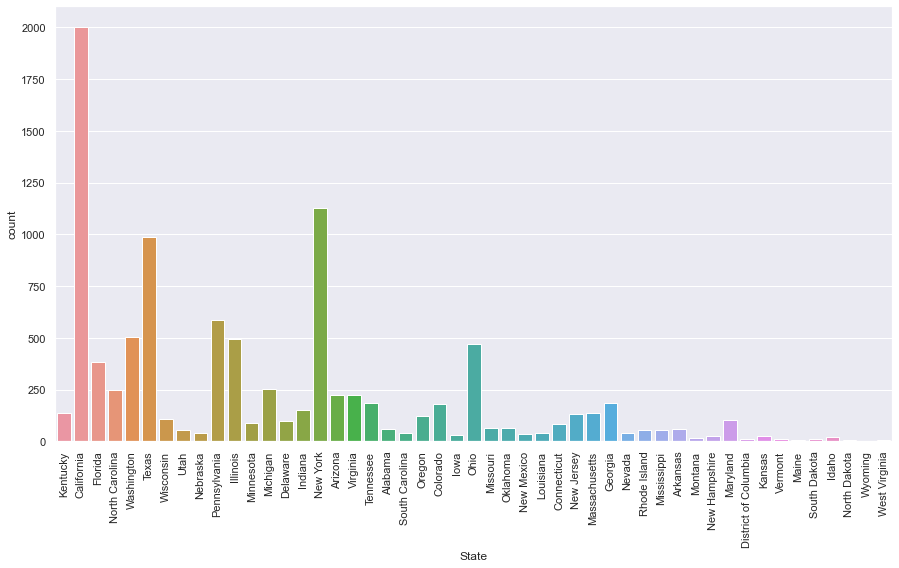

In [62]:
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

In [63]:
# Total number of rows and columns
df.shape

(9994, 12)

In [64]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (50, 12)


In [66]:
df = df.drop_duplicates()
df.head(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [67]:
df.count()

Ship Mode       9944
Segment         9944
Country         9944
City            9944
State           9944
Region          9944
Category        9944
Sub-Category    9944
Sales           9944
Quantity        9944
Discount        9944
Profit          9944
dtype: int64

In [68]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [69]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [70]:
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76215.9705,38.492914,-325.5720,1906.4850,1980,13.44180,98.153037,9634.018666
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


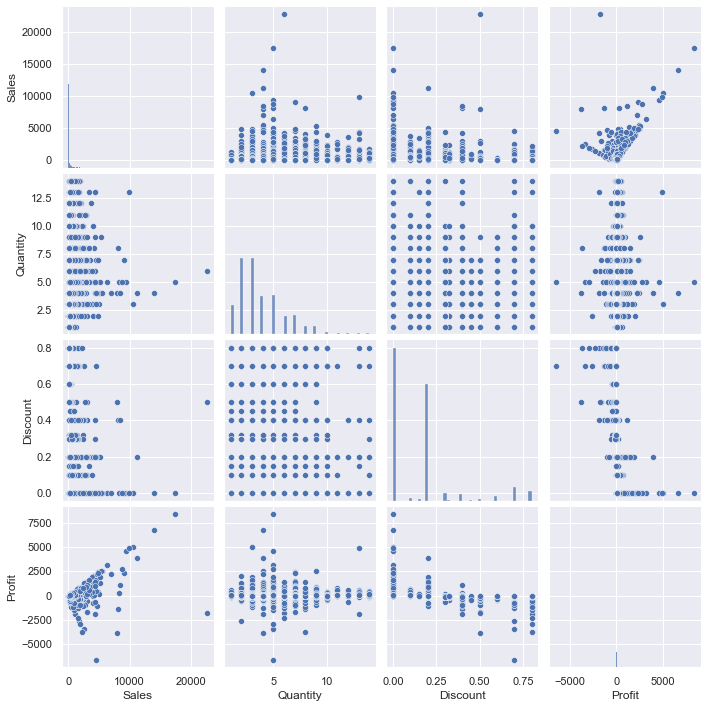

In [75]:
sns.pairplot(df)

In [76]:
Q1 = df.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = df.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')
IQR = Q3 - Q1

print(IQR)

Sales       192.7640
Quantity      3.0000
Discount      0.2000
Profit       27.8099
dtype: float64


<AxesSubplot:xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

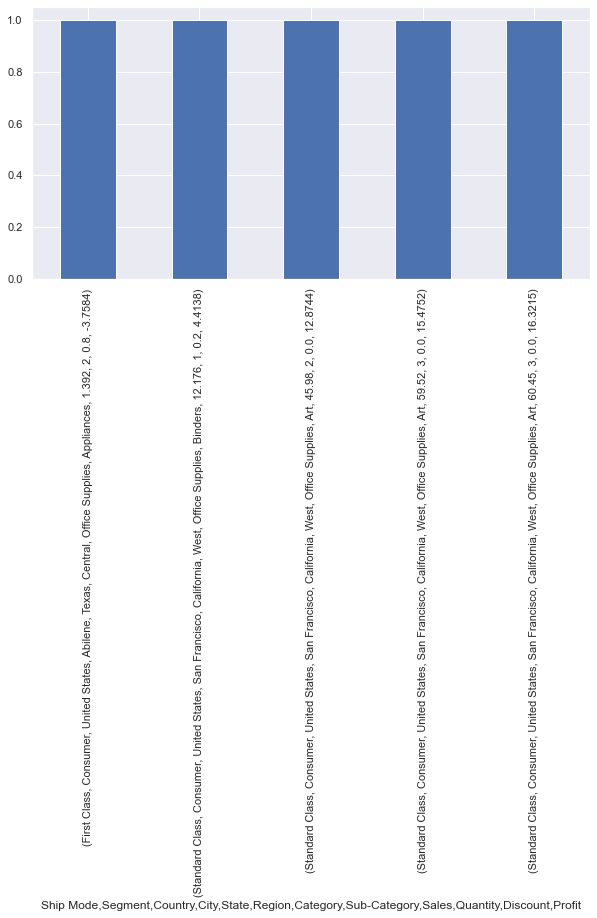

In [77]:
df.value_counts().nlargest().plot(kind = 'bar' , figsize = (10 , 5))

**-----------------END OF CODE-----------------------**